<a href="https://colab.research.google.com/github/swarajbhopatkar22/ML-Model/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
file_path = "/content/powerplaydataforkaggle.csv"
df = pd.read_csv(file_path)

In [5]:
print("Initial Data Preview:")
print(df.head())

Initial Data Preview:
   match_id  innings                                       venue  \
0    335982        1                       M Chinnaswamy Stadium   
1    335982        2                       M Chinnaswamy Stadium   
2    335983        1  Punjab Cricket Association Stadium, Mohali   
3    335983        2  Punjab Cricket Association Stadium, Mohali   
4    335984        1                            Feroz Shah Kotla   

                  batting_team                 bowling_team  Totalruns  \
0        Kolkata Knight Riders  Royal Challengers Bangalore         61   
1  Royal Challengers Bangalore        Kolkata Knight Riders         26   
2          Chennai Super Kings              Kings XI Punjab         53   
3              Kings XI Punjab          Chennai Super Kings         63   
4             Rajasthan Royals             Delhi Daredevils         40   

                                             batsmen  \
0          ['SC Ganguly' 'BB McCullum' 'RT Ponting']   
1  ['R Dravi

In [6]:
if 'Winner' not in df.columns:
    print("\nWinner column missing. Inferring based on Totalruns...")
    df['Winner'] = np.where(df['Totalruns'] >= df['Totalruns'].median(), df['batting_team'], df['bowling_team'])


Winner column missing. Inferring based on Totalruns...


In [7]:
df_encoded = df.copy()
df_encoded['batting_team'] = df_encoded['batting_team'].astype('category').cat.codes
df_encoded['bowling_team'] = df_encoded['bowling_team'].astype('category').cat.codes
df_encoded['Winner'] = df_encoded['Winner'].astype('category').cat.codes

In [8]:
X = df_encoded[['batting_team', 'bowling_team', 'Totalruns']]
y = df_encoded['Winner']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.9319526627218935


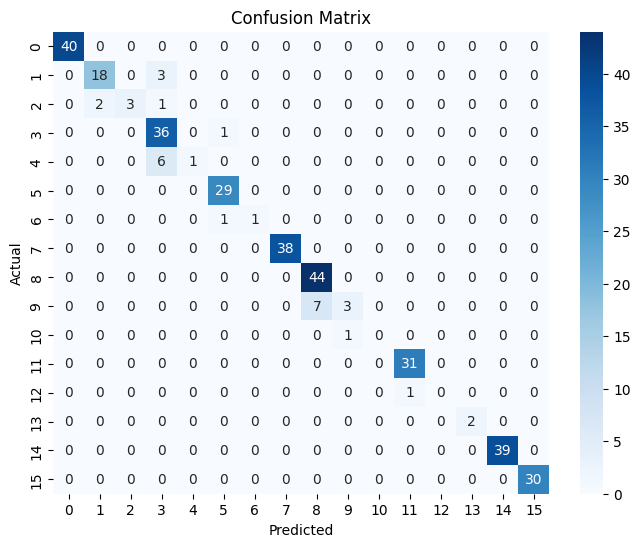

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
team_win_counts = df.groupby('Winner').size().reset_index(name='Win Count')
print("\nWinning Count for Each Team:")
print(team_win_counts)


Winning Count for Each Team:
                         Winner  Win Count
0           Chennai Super Kings        173
1               Deccan Chargers         83
2                Delhi Capitals         48
3              Delhi Daredevils        155
4                 Gujarat Lions         32
5               Kings XI Punjab        179
6          Kochi Tuskers Kerala         19
7         Kolkata Knight Riders        206
8                Mumbai Indians        224
9                 Pune Warriors         41
10                 Punjab Kings          8
11             Rajasthan Royals        159
12       Rising Pune Supergiant         16
13      Rising Pune Supergiants         12
14  Royal Challengers Bangalore        190
15          Sunrisers Hyderabad        142


<ipython-input-15-c3cf13ecbf76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_win_counts, x='Winner', y='Win Count', palette="coolwarm")


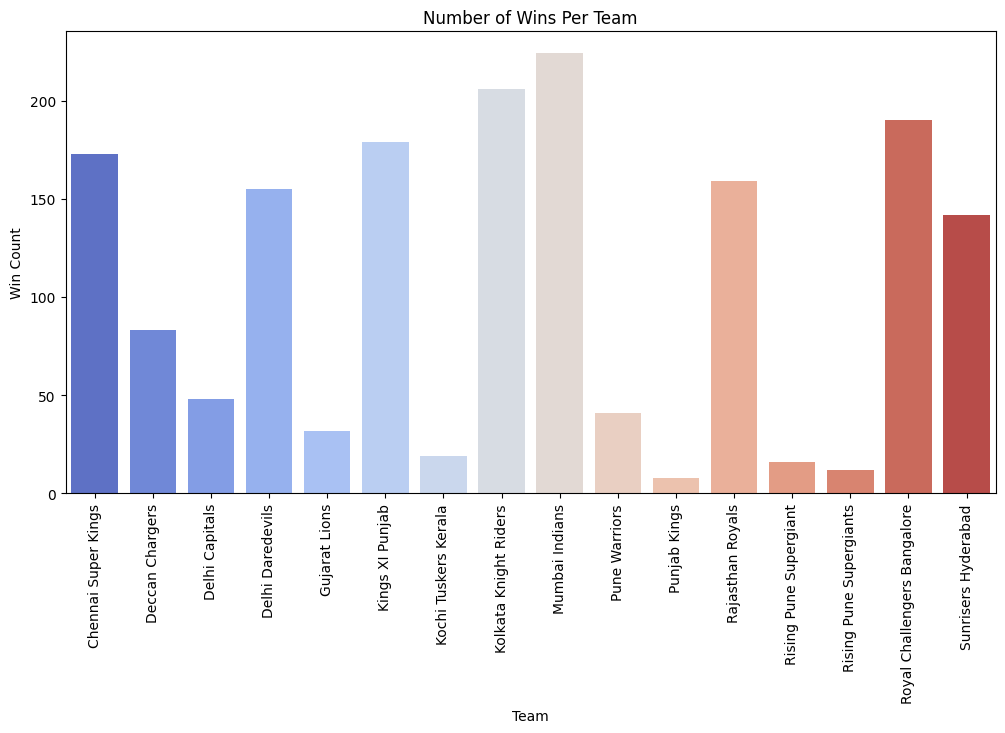

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=team_win_counts, x='Winner', y='Win Count', palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Number of Wins Per Team")
plt.xlabel("Team")
plt.ylabel("Win Count")
plt.show()